In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
from MPyDATA_examples.condensational_growth.analysis import figure_data
from MPyDATA_examples.condensational_growth.physics.equilibrium_drop_growth import PdfEvolver
from MPyDATA_examples.condensational_growth.plotter import Plotter
from MPyDATA_examples.utils.error_norms import L2

In [3]:
results, setup = figure_data()

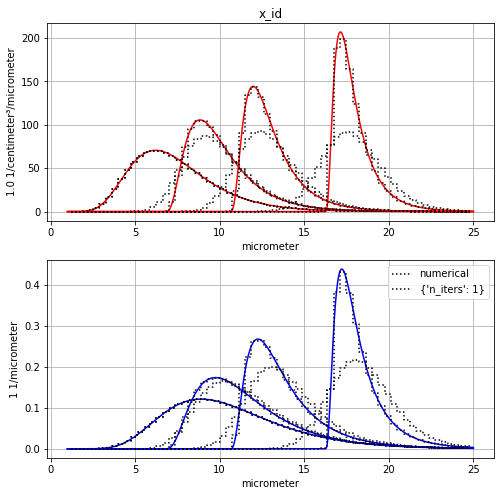

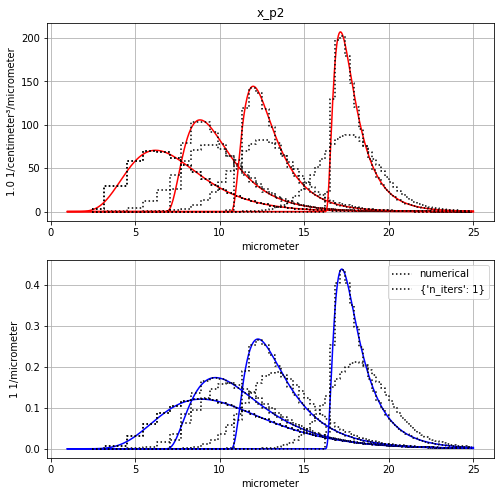

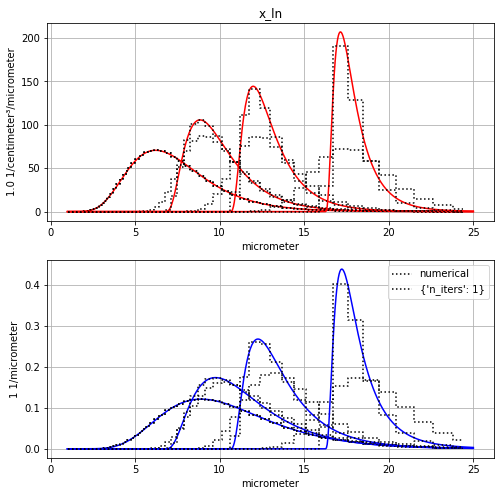

In [4]:
for coord in results.keys():
    plotter = Plotter(setup, coord)
    for opt_i, opts in enumerate(results[coord]['numerical'].keys()): 
        plot_data = results[coord]['numerical'][opts]
        for i in range(len(setup.nt)):
            mnorm = setup.mixing_ratios[i]
            t = setup.nt[i] * setup.dt
            if opt_i == 0:
                plotter.analytical_pdf(PdfEvolver(setup.pdf, setup.drdt, t), mnorm)
                plotter.numerical_pdf(results[coord]['grid']['r'], results[coord]['analytical'][i], bin_boundaries = results[coord]['grid']['rh'], label='numerical', mnorm=mnorm)
            plotter.numerical_pdf(
                results[coord]['grid']['r'], 
                plot_data[i], 
                label=opts, 
                bin_boundaries=results[coord]['grid']['rh'], 
                mnorm=mnorm
            )
    plotter.done()

In [22]:
def convergence_in_space(nr: list):
    err_data = {}
    for coord in results.keys():
        err_data[coord] = {}
        for opts in results[coord]["error_L2"].keys():
            err_data[coord][opts] = []
        
    for nri, nr in enumerate(nrs):
        data, setup = figure_data(nr=nr)
        for coord in data.keys():
            for opts in data[coord]["error_L2"].keys():
                err_data[coord][opts].append(data[coord]["error_L2"][opts])
    return err_data

In [46]:
nrs = [32, 64, 128, 256]  #TODO: do not repeat calc. for default nr!
err_data = convergence_in_space(nr = nr)

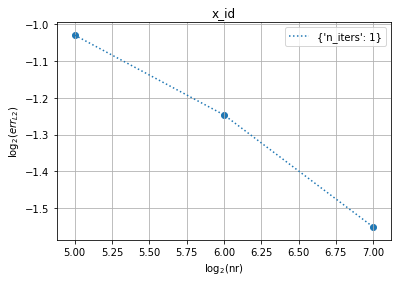

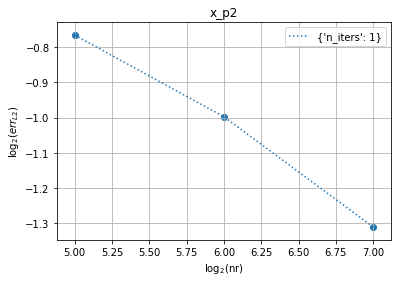

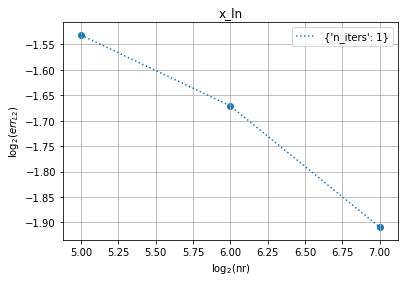

In [47]:
import matplotlib.pyplot as plt
import numpy as np

x = np.log2(nrs)
for coord in results.keys():
    for opts in err_data[coord].keys():
        plt.plot(x, err_data[coord][opts], label=opts, linestyle=':')
        plt.scatter(x, err_data[coord][opts])
    plt.title(coord)
    plt.legend()
    plt.gca().set_xlabel('log$_2$(nr)')
    plt.gca().set_ylabel('log$_2(err_{L2})$')
    plt.grid()
    plt.show()

In [ ]:
dts = [1 , 0.5, .25, .125]

In [ ]:
def convergence_in_time(dts: list):
    err_data = {}
    for coord in results.keys():
        err_data[coord] = {}
        for opts in results[coord]["error_L2"].keys():
            err_data[coord][opts] = []
        
    for dti, dt in enumerate(nrs):
        data, setup = figure_data(nr=nr)
        for coord in data.keys():
            for opts in data[coord]["error_L2"].keys():
                err_data[coord][opts].append(data[coord]["error_L2"][opts])
    return err_data